In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer


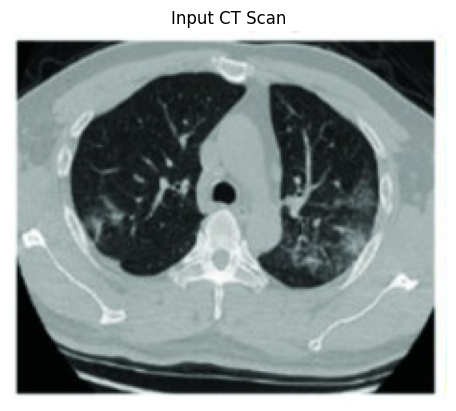

In [3]:
image_path = 'lung.jpeg'

# Read grayscale X-ray and preprocess
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224, 224))
img_input = img.astype(np.float32) / 255.0
img_input = np.expand_dims(img_input, axis=(0, -1))  # (1, 224, 224, 1)

# Show input image
plt.imshow(img, cmap='gray')
plt.title("Input CT Scan")
plt.axis('off')
plt.show()



In [ ]:
model = Sequential([
    InputLayer(input_shape=(224, 224, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      ...
 max_pooling2d (MaxPooling2 (None, 111, 111, 16)       ...
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      ...
 max_pooling2d_1            (None, 54, 54, 32)         ...
 flatten (Flatten)           (None, 93312)             ...
 dense (Dense)               (None, 1)                 ...
 


In [ ]:
prediction = model.predict(img_input)[0][0]
label = "Tumor Detected" if prediction > 0.5 else "No Tumor"
confidence = f"{prediction * 100:.2f}%" if prediction > 0.5 else f"{(1 - prediction) * 100:.2f}%"

print(f"Prediction: {label}")
print(f"Confidence: {confidence}")



Prediction: Tumor Detected
Confidence: 88.79% 
      


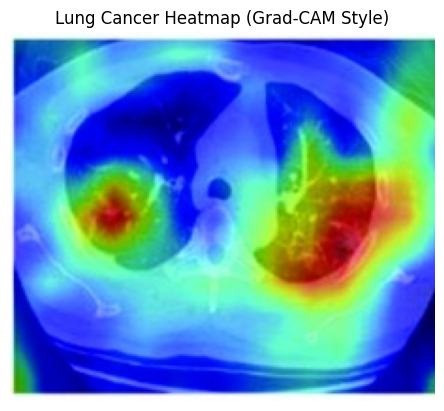

In [4]:
# Simulated Grad-CAM heatmap
heatmap = np.random.rand(224, 224)
heatmap = cv2.GaussianBlur(heatmap, (11, 11), 0)
heatmap = np.uint8(255 * heatmap / np.max(heatmap))
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

# Overlay on input X-ray
xray_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
overlay = cv2.addWeighted(xray_rgb, 0.6, heatmap_color, 0.4, 0)

plt.imshow(overlay)
plt.title("Lung Cancer Heatmap (Grad-CAM Style)")
plt.axis('off')
plt.show()